In [133]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


# https://www.machinelearningplus.com/time-series/time-series-analysis-python/

In [134]:
data = pd.read_csv('data_SandP.csv', index_col='Date', parse_dates=True)
data.head()

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


In [135]:
data.index

DatetimeIndex(['1871-01-01', '1871-02-01', '1871-03-01', '1871-04-01',
               '1871-05-01', '1871-06-01', '1871-07-01', '1871-08-01',
               '1871-09-01', '1871-10-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Date', length=1768, freq=None)

In [136]:
data1980_2014 = data.loc['1980':'2014']

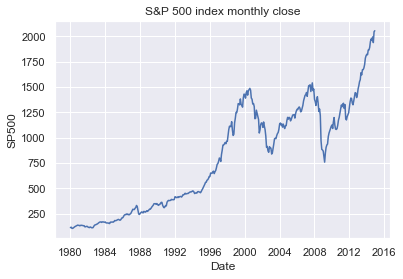

In [137]:
# data1980_2014.SP500.plot(); # matplotlib 

sns.set_theme(style="darkgrid")

data1980_2014_monthly = data1980_2014.resample('M').last()

sns.lineplot(data=data1980_2014, x = "Date", y = "SP500").set(title="S&P 500 index monthly close");

## The difference 

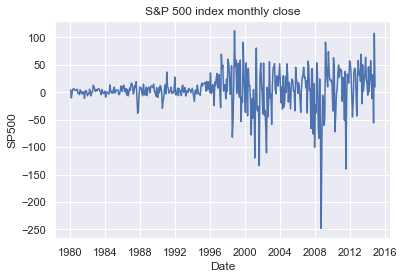

In [138]:
data1980_2014_diff = data1980_2014.diff().dropna()

sns.lineplot(data=data1980_2014_diff, x = "Date", y = "SP500").set(title="S&P 500 index monthly close");

## Natural logarithm

In [139]:
data1980_2014['SP500_log'] = np.log(data1980_2014['SP500'])


<ipython-input-139-c463a0516271>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1980_2014['SP500_log'] = np.log(data1980_2014['SP500'])


Here is the log plot with seaborn. However, I found it hard to create the regression line with dates in seaborn. Thus, I have used matplotlib

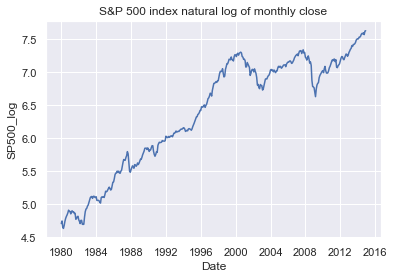

In [140]:
# f, ax = plt.subplots(1, 1)
# ax.plot(data1980_2014.index, data1980_2014.SP500_log)
sns.lineplot(data=data1980_2014, x = "Date", y = "SP500_log").set(title="S&P 500 index natural log of monthly close");

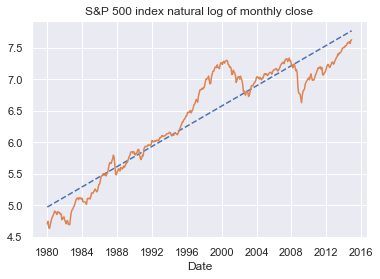

In [141]:
# Simple linear regression fit and prediction on time series data with visualization in python | by Ishan Mehta | Medium
# https://ishan-mehta17.medium.com/simple-linear-regression-fit-and-prediction-on-time-series-data-with-visualization-in-python-41a77baf104c 
# We will create a NumPy array starting from 0…df[‘date’].size -1 to fit the x-axis values in the linear regression model.
x = np.arange(data1980_2014.index.size)


# Now we will fit the linear regression using np.polyfit and get slope and intercept values. As it is linear regression we will have deg (degree) parameter as 1.
fit = np.polyfit(x, data1980_2014.SP500_log, deg=1)
# print ("Slope : " + str(fit[0]))
# print ("Intercept : " + str(fit[1]))

# Now we will plot this fit initializing it to a fit function
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)

#Linear regression plot
plt.plot(data1980_2014.index, fit_function(x), linestyle= "--")
#Time series data plot
plt.plot(data1980_2014.index, data1980_2014.SP500_log)

plt.xlabel('Date')
plt.title('S&P 500 index natural log of monthly close')
plt.show();


## Difference for natural logarithm

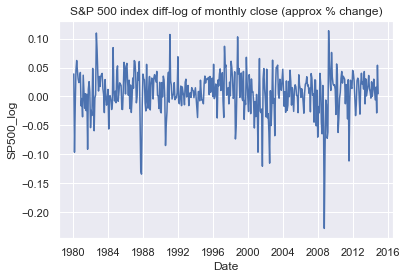

In [142]:
data1980_2014_diff = data1980_2014.diff().dropna() # I am re-running this line to calculate diff after log 

sns.lineplot(data=data1980_2014_diff, x = "Date", y = "SP500_log").set(title="S&P 500 index diff-log of monthly close (approx % change)");